**Lab 4: FIR filters and envelopes**

The goal of this lab is to learn how to implement FIR filters in Python, and how we can use them to improve our synthesis.

In [1]:
import os
import numpy as np
import librosa
import IPython.display as ipd
from scipy import signal
import matplotlib.pyplot as plt

from util import load_audio, plot_signals, plot_spectrogram, plot_mean_spectrogram

**1. Overview of Filtering**

For this lab, we will define an FIR filter as a discrete-time system that converts an input signal $x[n]$ into an output signal $y[n]$ by means of the weighted summation:

$$
y[n] = \sum_{k=0}^M b_kx[n-k]
$$

The function *np.convolve()* is a generic function with which to implement FIR filters. The following code implements a three-point averaging system:

In [2]:
fs = 1
x = [np.floor(x/10) for x in range(50)]
b = np.array([1.0/3, 1.0/3, 1.0/3])
y = np.convolve(b, x)

plot_signals([x, y], fs, name=['input x[n]', 'output y[n]'], mode='lines+markers')

1.1 Explain the filtering action of the 5-point averager by comparing the plot of the input $x[n]$ and the output $y[n]$. This filter might be called a “smoothing” filter. Note how the transitions from one level to another have been “smoothed.”

The 5-point averager, is used to smooth or average a signal. It operates by averaging the current sample and four previous samples from the input signal to create a smoother output. This filtering action reduces the impact of high-frequency noise and sharp transitions in the input. We can see this from the example above by noteching how the transitions last longer and have less of an angle of attack. It's an overall smoother graphic than the blue one.

*1.2* Define a function `averaging_filter(x, N)` which implements the N-points averaging filter using the `np.convolve` function.

In [3]:
import numpy as np

def averaging_filter(x, N):
    """
    Applies a N-point averaging filter to the input signal x

    Parameters
    ----------
    x : np.array
        The input signal in the form of a numpy array
    N : int
        The number of points used in N-point averaging filter

    Returns
    -------
    y : np.array
        The output of the filter
    """
    # Create an array to store the filter coefficients
    b = np.ones(N) / N  # Initialize with 1/N repeated N times

    # Convolve the input signal with the filter coefficients
    y = np.convolve(b, x, mode='valid')  # Use 'valid' mode to match the output length

    return y

# Example usage:
input_signal = np.array([1, 2, 3, 4, 10, 6, 7, 8, 9])
N = 3
filtered_signal = averaging_filter(input_signal, N)
print("Input Signal:", input_signal)
print("Filtered Signal:", filtered_signal)



Input Signal: [ 1  2  3  4 10  6  7  8  9]
Filtered Signal: [2.         3.         5.66666667 6.66666667 7.66666667 7.
 8.        ]


1.3 Run the example above using the `averaging_filter` instead. Change the number N to different values and explain what happen.

In [4]:
# Write your code here
a = averaging_filter(x, 5)
b = averaging_filter(x, 6)
c = averaging_filter(x, 7)
plot_signals([a, b, c], fs, name=['N = 5', 'N = 6', 'N = 7'], mode='lines+markers')



In [5]:
import numpy as np
import matplotlib.pyplot as plt
# we wanted to observe better the effects of FIR on a more real signal, that's this code

# Parameters
n_samples = 500  # Number of samples
t = np.linspace(0, 10, n_samples)  # Time vector
frequency = 1.0  # Frequency of the sine wave (in Hz)
amplitude = 1.0  # Amplitude of the sine wave
noise_stddev = 0.2  # Standard deviation of noise

# Generate a noisy sine wave signal
x = amplitude * np.sin(2 * np.pi * frequency * t) + noise_stddev * np.random.randn(n_samples)
a = averaging_filter(x, 5)
b = averaging_filter(x, 6)
c = averaging_filter(x, 7)
plot_signals([x, a, b, c], fs, name=['normal signal','N = 5', 'N = 6', 'N = 7'], mode='lines+markers')


1.4 How would you classify this filter, as a low-pass o high-pass filter?

it smooths the signal by averaging a range of samples, which effectively reduces the impact of high-frequency noise or rapid changes in the signal. This behavior makes it a low-pass filter, as it passes the lower-frequency components and attenuates the higher-frequency components, resulting in a smoother signal.







---

**2. Envelope detector**

Now we'll implement an envelope detector by concatenating two systems: a full-wave rectifier (absolute value) and the N-point averaging filter.

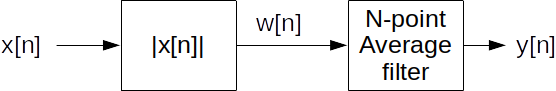

2.1 Define a function `envelope(x, N)` which applies an N-point averaging filter to the full-wave rectified signal and returns the output $y[n]$.

**Note 1**: to calculate the full-wave rectified signal check the `np.abs()` function.

**Note 2**: The output should have the same length as the input signal. Use 'same' mode (see [np.convolve](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html) documentation).

In [6]:

def envelope(x, N):
    """
    Extracts the envelope of the input signal x by concatenating a full-wave rectifier and an N-point averaging filter.

    Parameters
    ----------
    x : np.array
        The input signal in the form of a numpy array
    N : int
        The number of points used in N-point averaging filter

    Returns
    -------
    y : np.array
        The output of the system, i.e., the envelope of the signal x.
    """
    if N < 1:
      raise ValueError("N must be at least 1")

    # Step 1: Full-wave rectifier (absolute value)
    rectified_signal = np.abs(x)

    # Step 2: Apply N-point averaging filter to the rectified signal
    filter_coeffs = np.ones(N) / N
    envelope_signal = np.convolve(rectified_signal, filter_coeffs, mode='same')

    return envelope_signal
#This function first calculates the full-wave rectified signal by taking the absolute value of the input signal x. Then, it applies an N-point averaging filter to the rectified signal, resulting in the envelope of the input signal. The output has the same length as the input signal, as specified in the docstring.




2.2 Load your reference signal and calculate its envelope using the function you designed. Plot the reference signal and envelope in the same figure.

In [13]:
# Write your code here
#!git clone https://github.com/FrancescXarrie/-sis1_group4.git
filepath = "./-sis1_group4/44733__casualdave__601e.wav"
ref, fs = load_audio(filepath)
import numpy as np
import matplotlib.pyplot as plt
# we wanted to observe better the effects of FIR on a more real signal, that's this code

# Parameters
n_samples = 500  # Number of samples
t = np.linspace(0, 10, n_samples)  # Time vector
frequency = 1.0  # Frequency of the sine wave (in Hz)
amplitude = 1.0  # Amplitude of the sine wave
noise_stddev = 0.2  # Standard deviation of noise

# Generate a noisy sine wave signal
x = amplitude * np.sin(2 * np.pi * frequency * t) + noise_stddev * np.random.randn(n_samples)
a = envelope(x, 5)
b = envelope(x, 6)
c = envelope(x, 7)
plot_signals([x, a, b, c], fs, name=['normal signal','N = 5', 'N = 6', 'N = 7'], mode='lines+markers')

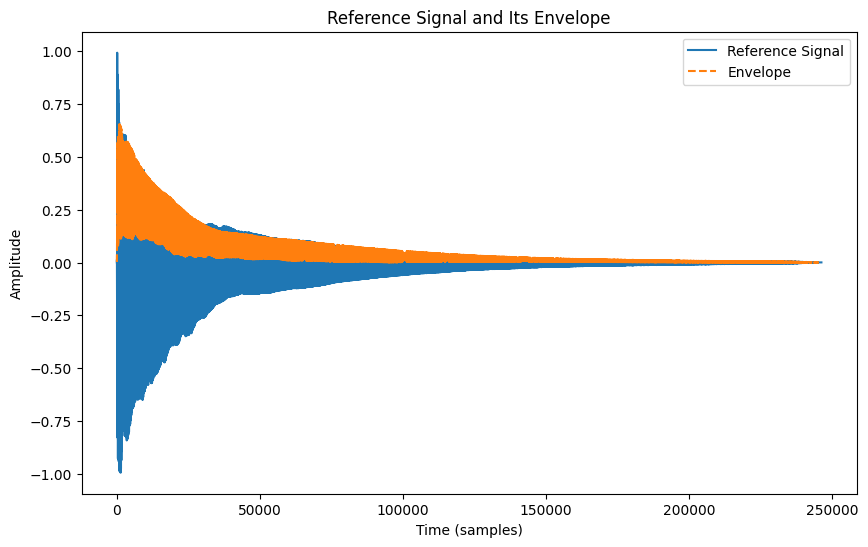

In [8]:
# Write your code here
filepath = "./-sis1_group4/44733__casualdave__601e.wav"
ref, fs = load_audio(filepath)
# we wanted to observe better the effects of FIR on a more real signal, that's this code

N = 15  # This can be tuned depending on the desired smoothness

# Calculate the envelope of the reference signal
envelope_signal = envelope(ref, N)

# Plot the reference signal and its envelope
plt.figure(figsize=(10, 6))
plt.plot(ref, label='Reference Signal')
plt.plot(envelope_signal, label='Envelope', linestyle='--')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Reference Signal and Its Envelope')
plt.legend()
plt.show()

2.3 Change the number N to get a good result. What happens when you change the number N?

Smaller N results in less smoothing and more detail in the output.
Larger N results in more smoothing and a flatter output, where abrupt transitions are softened.

2.4 Explain with your own words why this system achieves extracting the envelope. It might be useful to plot together the signals $x[n]$, $w[n]$ and $y[n]$.

The envelope function (due to its main components: the full-wave rectifier and the N-point averaging filter) smoothes the function and returns it in absolute value (we can see how it matches the original signal when it's positive) 

2.5 Now let's apply this envelope to the synthesized signal. Copy the code from Lab3 Ex. 2.1 and generate the synthesized signal. Then multiply the synthesized signal by the envelope. Note that both signal and envelope should have the same length. You can define a time vector of the same length of the envelope to create the signal:

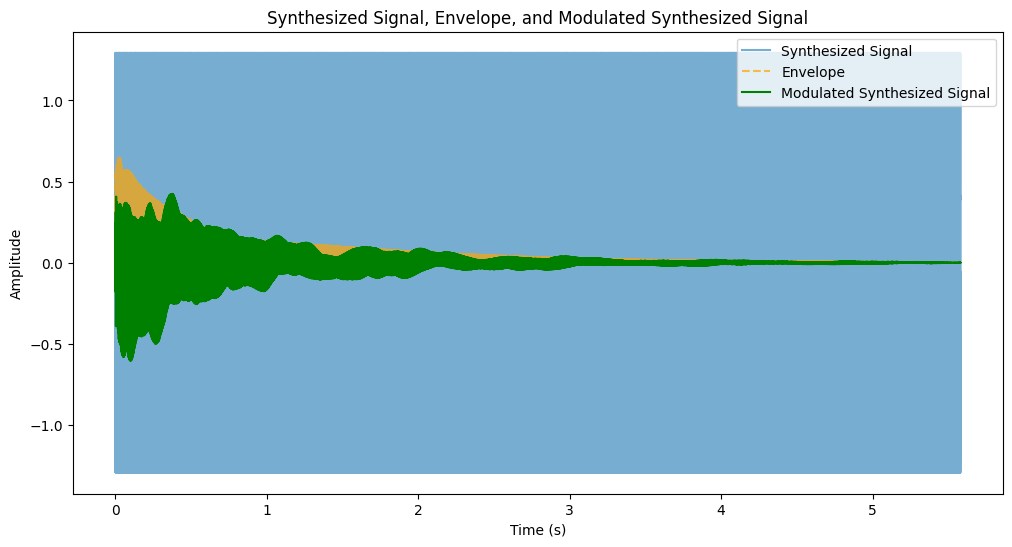

In [9]:
# Step 1: Define parameters and generate the synthesized signal as in Lab 3 Ex. 2.1
f0 = 328.38  # Fundamental frequency
fs = 44100  # Sampling frequency
duration = len(envelope_signal) / fs  # Ensure the duration matches the length of the envelope
t = np.arange(0, duration, 1 / fs)  # Time vector with the same length as the envelope

# Amplitude weights (these should be based on previously calculated values in Lab 3)
Ak = [1, 0.381, 0.207, 0.134, 0.258, 0.106, 0.037, 0.082, 0.076, 0.009]

# Synthesized signal function (copied from Lab 3)
def synthesize(f0, phi, Ak, t): 
    y = 0
    for k in range(1, len(Ak) + 1):
        y += Ak[k-1] * np.cos(2 * np.pi * k * f0 * t + k * phi - (k - 1) * np.pi / 2)
    return y

# Generate synthesized signal
phi = -1*np.pi / 4  # Initial phase
synthesized_signal = synthesize(f0, phi, Ak, t)

# Step 2: Apply the envelope
# Ensure the synthesized signal and envelope are of the same length
if len(synthesized_signal) != len(envelope_signal):
    synthesized_signal = synthesized_signal[:len(envelope_signal)]

# Multiply synthesized signal by the envelope to apply amplitude modulation
modulated_synthesized_signal = synthesized_signal * envelope_signal

# Step 3: Plot the original synthesized signal, envelope, and modulated signal
plt.figure(figsize=(12, 6))
plt.plot(t, synthesized_signal, label='Synthesized Signal', alpha=0.6)
plt.plot(t, envelope_signal, label='Envelope', linestyle='--', color='orange', alpha=0.7)
plt.plot(t, modulated_synthesized_signal, label='Modulated Synthesized Signal', linestyle='-', color='green', linewidth=1.5)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Synthesized Signal, Envelope, and Modulated Synthesized Signal')
plt.legend()
plt.show()


2.6. Compare the spectrograms of the reference signal and the synthesized signal. What are the main differences?

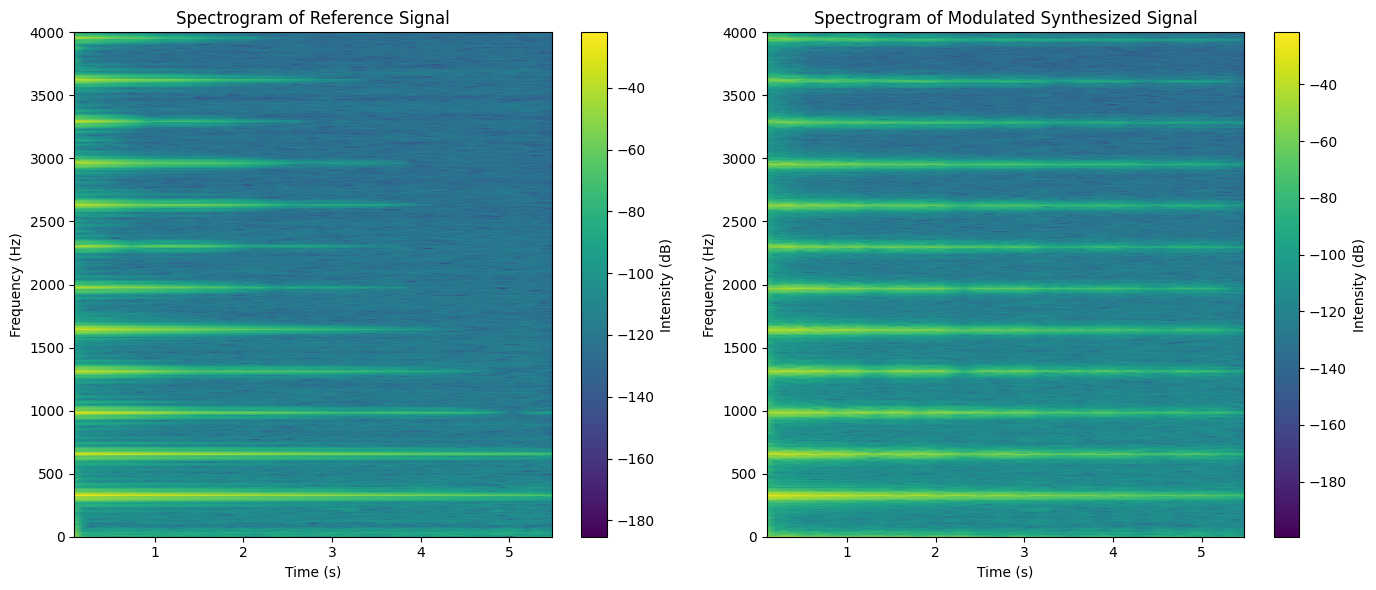

In [10]:
# Write your code here
from scipy import signal

# Define window length and other parameters
window_length = 8192  # Same window length used previously
nperseg = window_length
noverlap = window_length // 2

# Step 1: Compute the spectrogram for the reference signal
ff_ref, tt_ref, S_ref = signal.spectrogram(ref, fs, nperseg=nperseg, noverlap=noverlap)

# Step 2: Compute the spectrogram for the modulated synthesized signal
ff_synth, tt_synth, S_synth = signal.spectrogram(modulated_synthesized_signal, fs, nperseg=nperseg, noverlap=noverlap)

# Step 3: Plot both spectrograms for comparison
plt.figure(figsize=(14, 6))

# Plot reference spectrogram
plt.subplot(1, 2, 1)
plt.pcolormesh(tt_ref, ff_ref, 10 * np.log10(S_ref), shading='gouraud')
plt.colorbar(label='Intensity (dB)')
plt.title('Spectrogram of Reference Signal')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.ylim([0, 4000])  # Adjust frequency range if needed

# Plot synthesized spectrogram with envelope applied
plt.subplot(1, 2, 2)
plt.pcolormesh(tt_synth, ff_synth, 10 * np.log10(S_synth), shading='gouraud')
plt.colorbar(label='Intensity (dB)')
plt.title('Spectrogram of Modulated Synthesized Signal')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.ylim([0, 4000])  # Adjust frequency range if needed

plt.tight_layout()
plt.show()



2.7 Listen to the synthesized signal and compare it to the reference.



In [11]:
from IPython.lib.display import Audio
Audio(modulated_synthesized_signal, rate=fs)

In [12]:
Audio(ref, rate=fs)